<a href="https://colab.research.google.com/github/vaidande/Drone/blob/main/Drone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
!git reset --hard 68211f72c99915a15855f7b99bf5d93f5631330f

Cloning into 'yolov5'...
remote: Enumerating objects: 6260, done.
remote: Counting objects: 100% (54/54), done.
remote: Compressing objects: 100% (36/36), done.
remote: Total 6260 (delta 24), reused 38 (delta 18), pack-reused 6206
Receiving objects: 100% (6260/6260), 8.52 MiB | 35.30 MiB/s, done.
Resolving deltas: 100% (4279/4279), done.
/content/yolov5
HEAD is now at 68211f7 FROM nvcr.io/nvidia/pytorch:20.10-py3 (#1553)


In [2]:
!nvidia-smi

Wed May 12 06:37:31 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install -r requirements.txt
!pip install torch==1.7.0+cu110 torchvision==0.8.1+cu110 torchaudio===0.7.0 -f https://download.pytorch.org/whl/torch_stable.html

import torch

from IPython.display import Image, clear_output  # to display images
from utils.google_utils import gdrive_download  # to download models/datasets

print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

     |████████████████████████████████| 645kB 32.5MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     |███████████████████████▌        | 834.1MB 1.1MB/s eta 0:04:24tcmalloc: large alloc 1147494400 bytes == 0x55887b5be000 @  0x7f963ff40615 0x558841626cdc 0x55884170652a 0x558841629afd 0x55884171afed 0x55884169d988 0x5588416984ae 0x55884162b3ea 0x55884169d7f0 0x5588416984ae 0x55884162b3ea 0x55884169a32a 0x55884171be36 0x558841699853 0x55884171be36 0x558841699853 0x55884171be36 0x558841699853 0x55884171be36 0x55884179e3e1 0x5588416fe6a9 0x558841669cc4 0x55884162a559 0x55884169e4f8 0x55884162b30a 0x5588416993b5 0x5588416987ad 0x55884162b3ea 0x5588416993b5 0x55884162b30a 0x5588416993b5
     |█████████████████████████████▊  | 1055.7MB 1.3MB/s eta 0:01:02tcmalloc: large alloc 1434370048 bytes == 0x5588bfc14000 @  0x7f963ff40615 0x558841626cdc 0x5588417

In [4]:
%cd /content

/content


In [5]:
!curl -L "https://public.roboflow.com/ds/ov7otFn5gB?key=Kc8psIYZKh" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   896  100   896    0     0   1756      0 --:--:-- --:--:-- --:--:--  1756
100 35.6M  100 35.6M    0     0  37.6M      0 --:--:-- --:--:-- --:--:-- 37.6M
Archive:  roboflow.zip
 extracting: test/images/DJI_0267_JPG.rf.659fc518abe4994a0a04b681103029cc.jpg  
 extracting: test/images/DJI_0289_JPG.rf.7d2ce495fb2d3a19962e761e718c3a5e.jpg  
 extracting: test/images/DJI_0267_JPG.rf.12b4ae5e9e4ac08da13f17c5e555fd8f.jpg  
 extracting: test/images/DJI_0267_JPG.rf.0a39d3f51902b67bf0162fe19793d9aa.jpg  
 extracting: test/images/DJI_0262_JPG.rf.8c378a23b8822f63a44ad24c8787fab3.jpg  
 extracting: test/images/DJI_0316_JPG.rf.2406ceec1ba7c548483c4f2e33c674b9.jpg  
 extracting: test/images/DJI_0312_JPG.rf.783c9643ea6b0f5cc51eff20b27af449.jpg  
 extracting: test/images/DJI_0312_JPG.rf.544df0e3a7b2778052c9110942b032a7.jpg  
 extracting: test/ima

In [6]:
%cat data.yaml

train: ../train/images
val: ../valid/images

nc: 5
names: ['boat', 'car', 'dock', 'jetski', 'lift']

In [7]:
import yaml
with open("data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [8]:
%cat /content/yolov5/models/yolov5s.yaml

# parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-

In [9]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [10]:
%%writetemplate /content/yolov5/models/custom_yolov5s.yaml

# parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple

# anchors
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Focus, [64, 3]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, BottleneckCSP, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 9, BottleneckCSP, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, BottleneckCSP, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 1, SPP, [1024, [5, 9, 13]]],
   [-1, 3, BottleneckCSP, [1024, False]],  # 9
  ]

# YOLOv5 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, BottleneckCSP, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, BottleneckCSP, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, BottleneckCSP, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, BottleneckCSP, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [13]:
%%time
%cd /content/yolov5
!python train.py --img 640 --batch 16 --epochs 500 --data '/content/data.yaml' --cfg /content/yolov5/models/custom_yolov5s.yaml --weights '' --name yolov5s_results  --cache

/content/yolov5
Using torch 1.7.0+cu110 CUDA:0 (Tesla T4, 15109MB)

Namespace(adam=False, batch_size=16, bucket='', cache_images=True, cfg='/content/yolov5/models/custom_yolov5s.yaml', data='/content/data.yaml', device='', epochs=500, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], local_rank=-1, log_imgs=16, multi_scale=False, name='yolov5s_results', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/yolov5s_results3', single_cls=False, sync_bn=False, total_batch_size=16, weights='', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-05-12 06:48:04.893538: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_

In [14]:
%cd /content/yolov5
!python detect.py --weights /content/yolov5/runs/train/yolov5s_results3/weights/best.pt --img 640 --conf 0.4 --source ../test/images

/content/yolov5
Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='../test/images', update=False, view_img=False, weights=['/content/yolov5/runs/train/yolov5s_results3/weights/best.pt'])
Using torch 1.7.0+cu110 CUDA:0 (Tesla T4, 15109MB)

Fusing layers... 
Model Summary: 232 layers, 7257306 parameters, 0 gradients
image 1/32 /content/test/images/DJI_0262_JPG.rf.3878c367b5f00b7ce0f5c9bdcb4d8486.jpg: 480x640 Done. (0.022s)
image 2/32 /content/test/images/DJI_0262_JPG.rf.47ce7cf6d8e3e310ab9b2b5c15ebba72.jpg: 480x640 Done. (0.013s)
image 3/32 /content/test/images/DJI_0262_JPG.rf.560b36a2e292c1b3dee7eae7e1f3fbf0.jpg: 480x640 1 docks, 1 jetskis, 1 lifts, Done. (0.014s)
image 4/32 /content/test/images/DJI_0262_JPG.rf.5f24b2ccccf544d3bb0c3cb740be0f4b.jpg: 480x640 1 boats, 1 docks, 1 lifts, Done. (0.013s)
image 5/32 /content/test/images/DJI

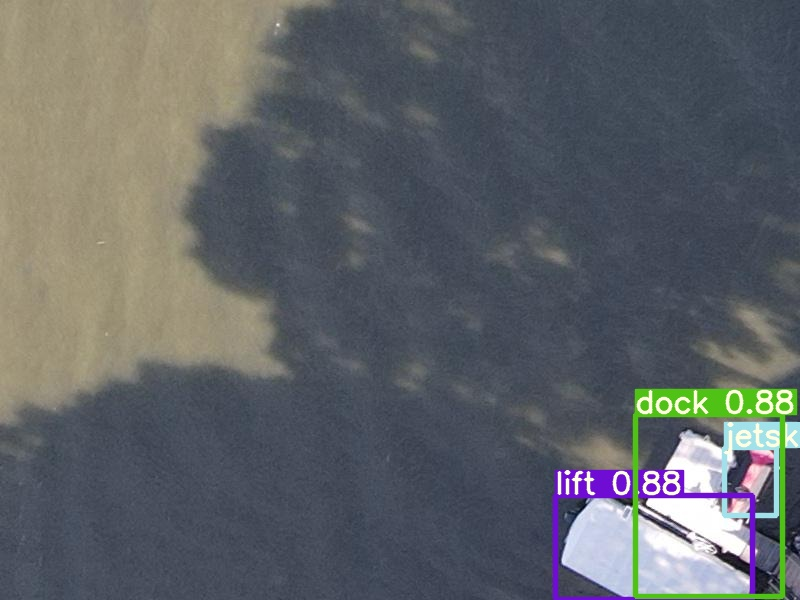

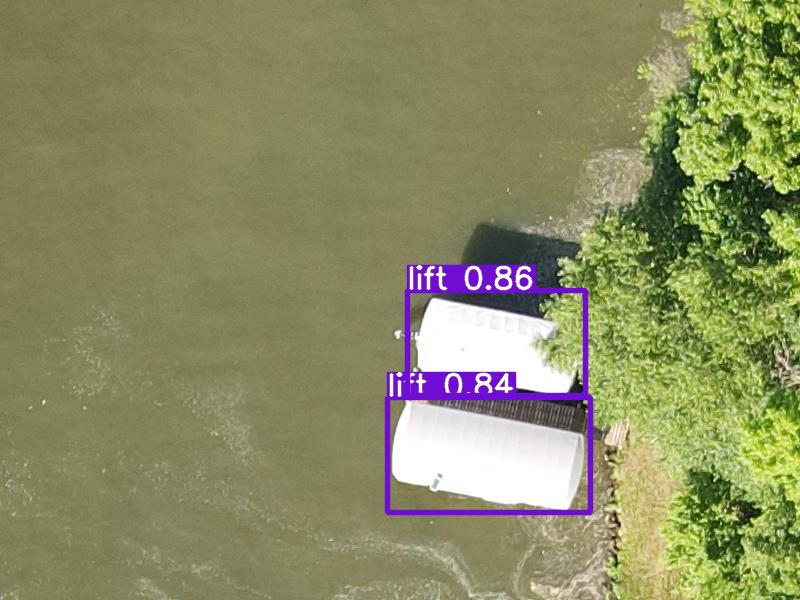

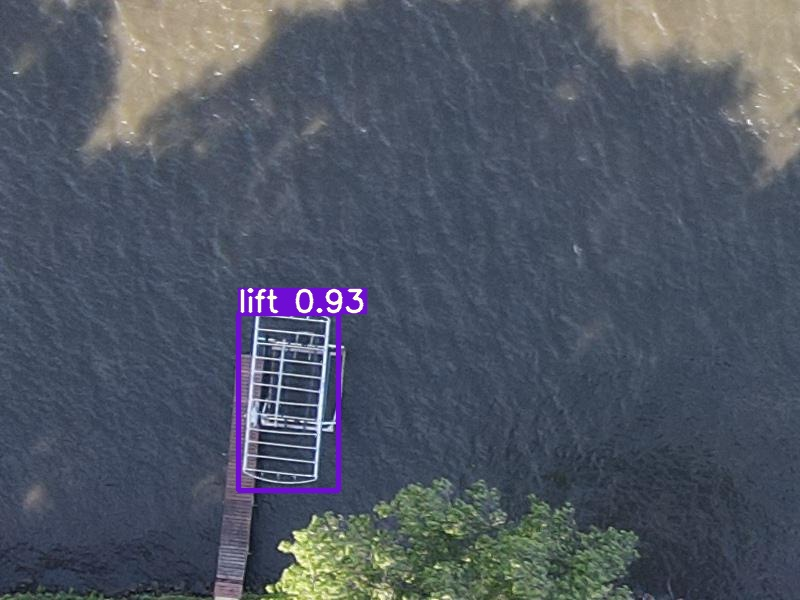

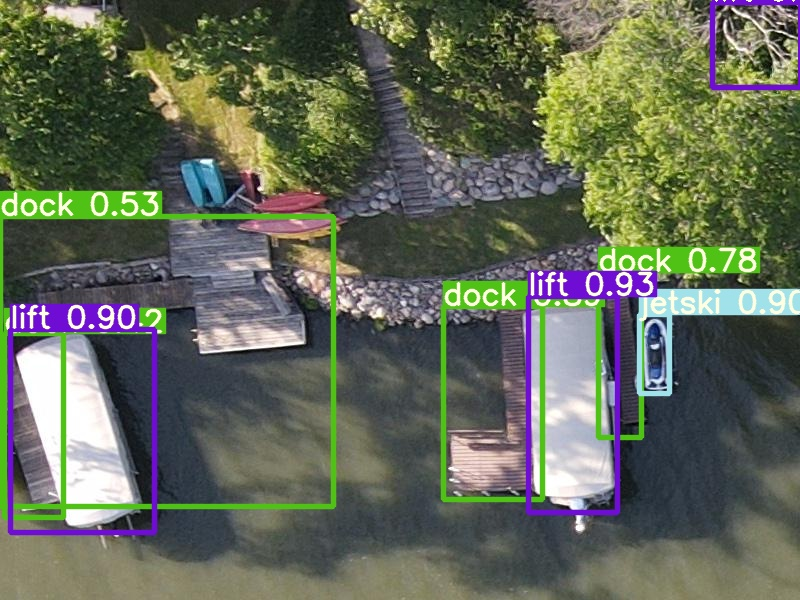

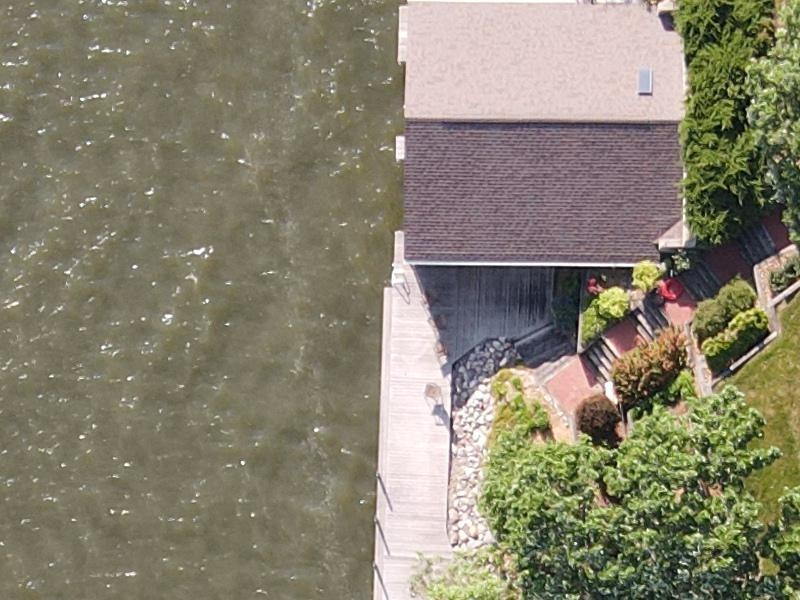

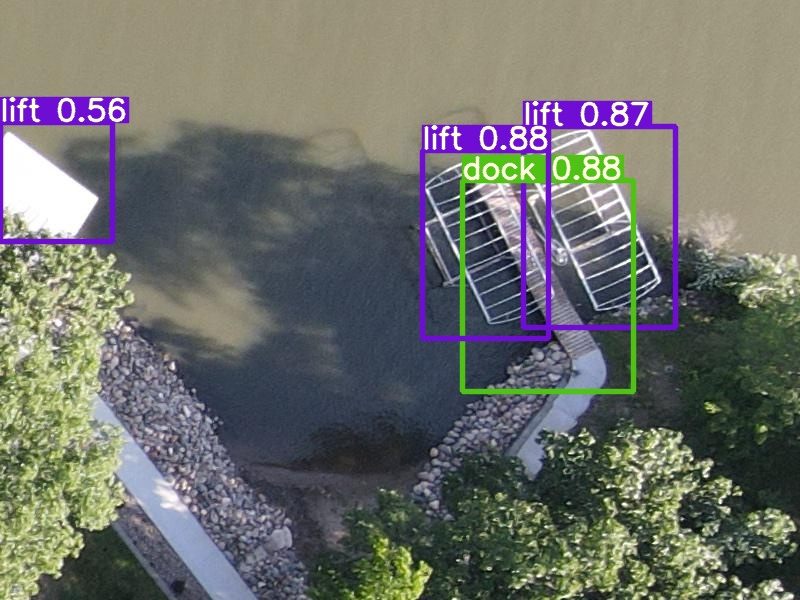

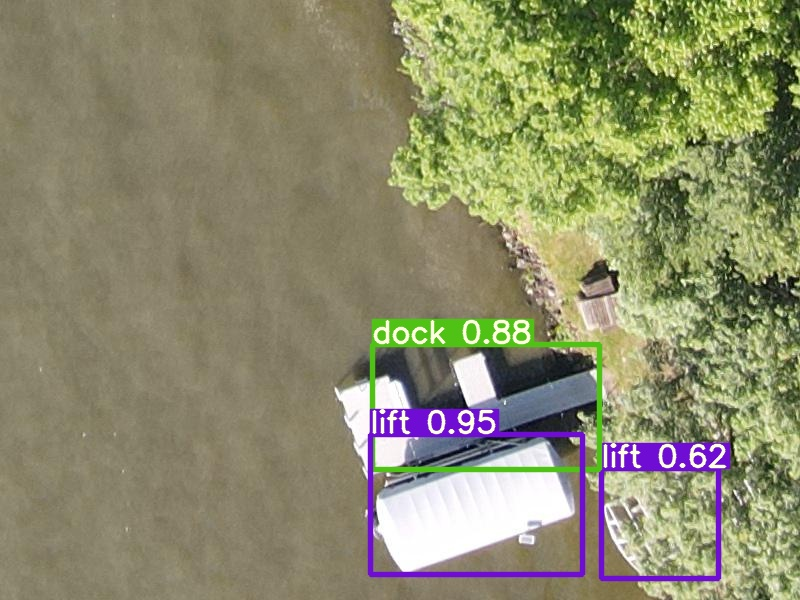

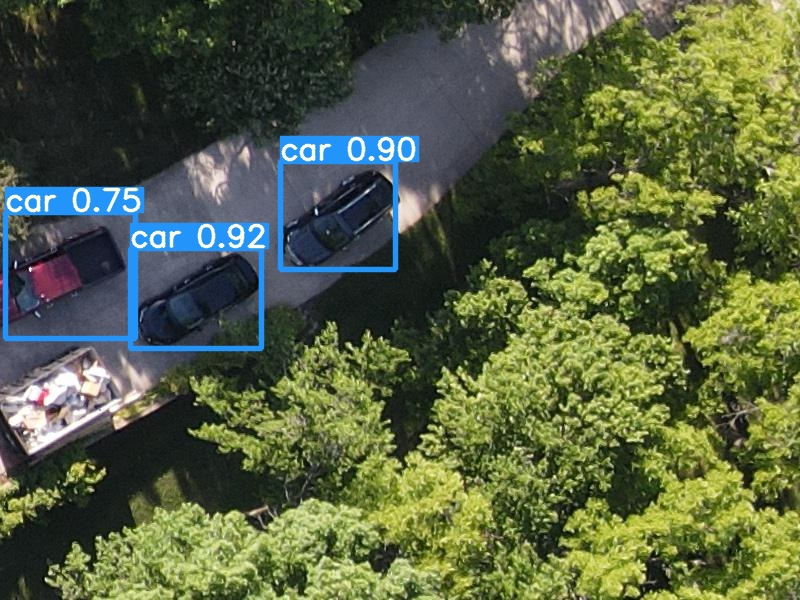

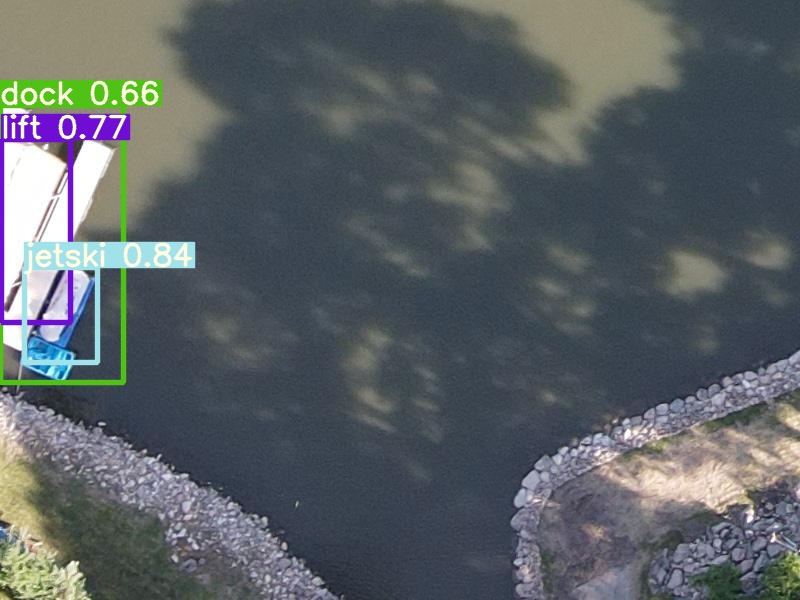

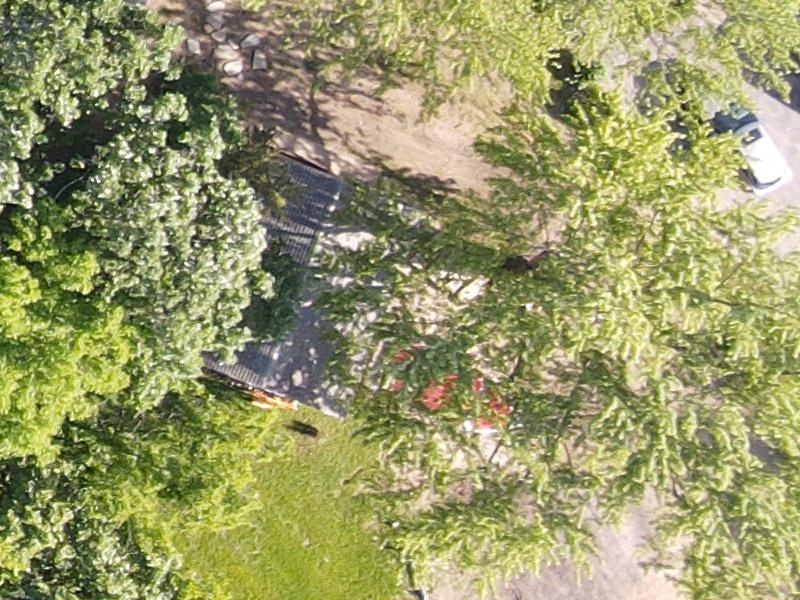

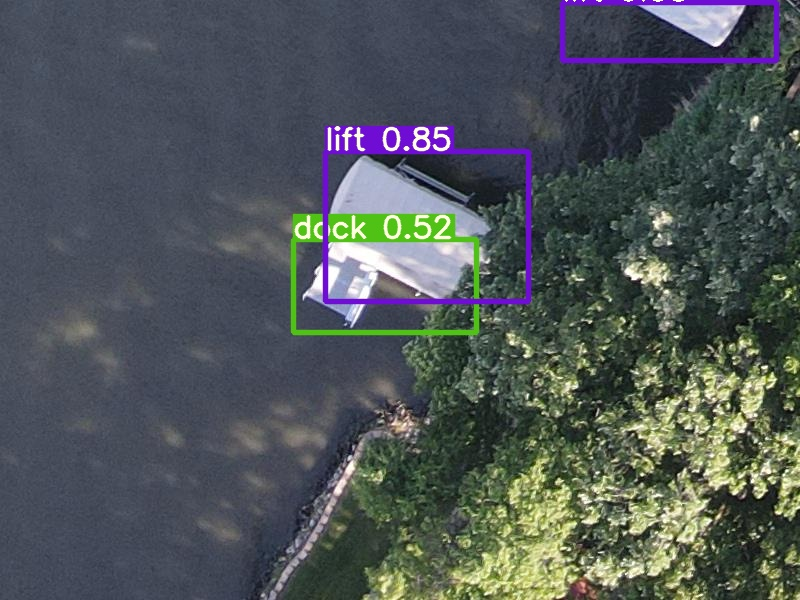

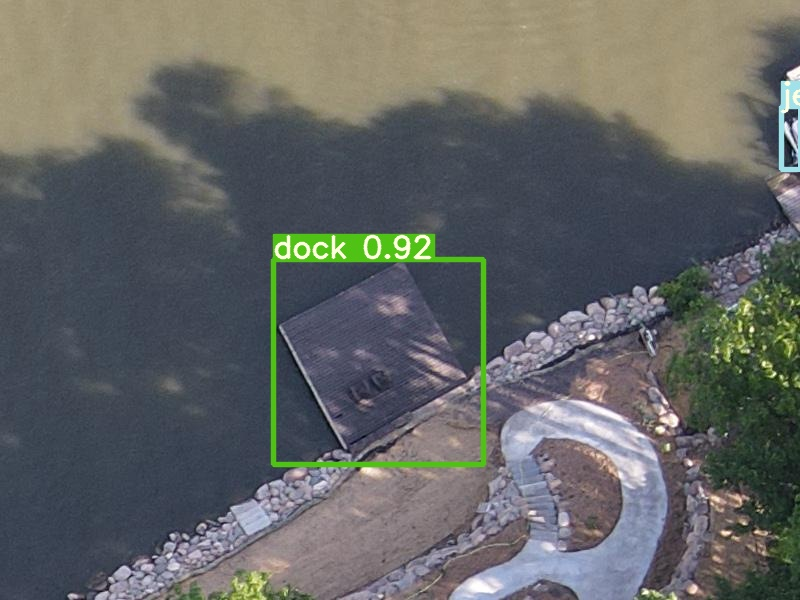

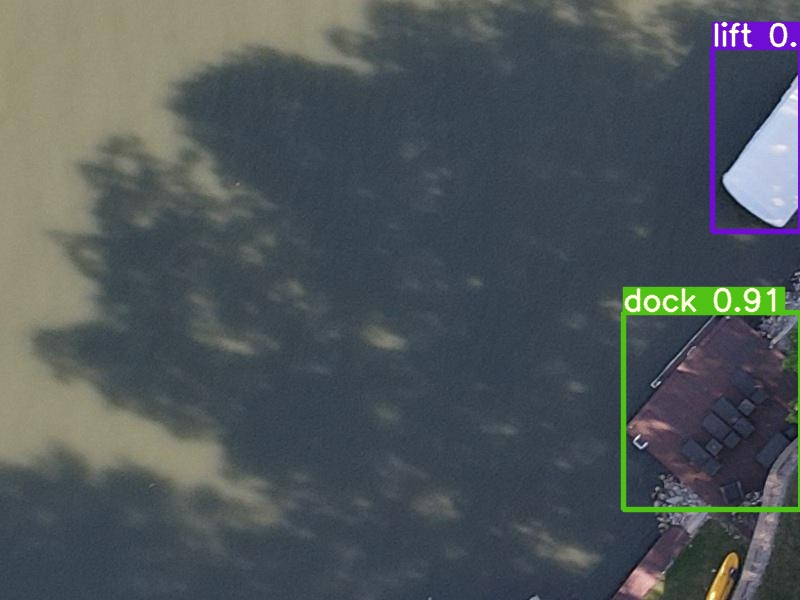

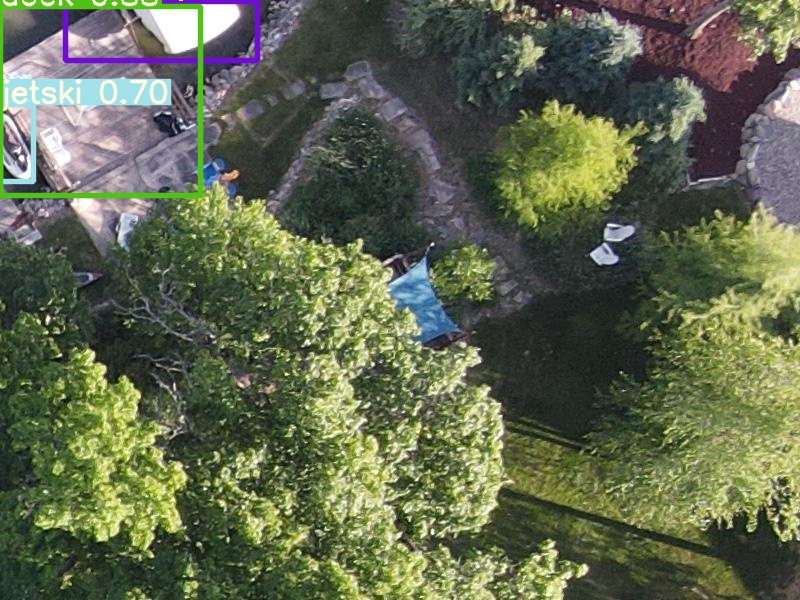

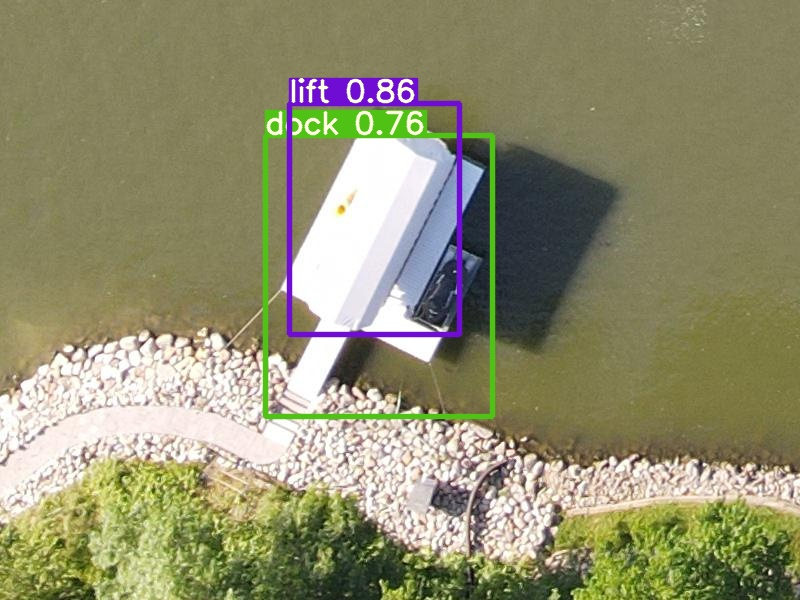

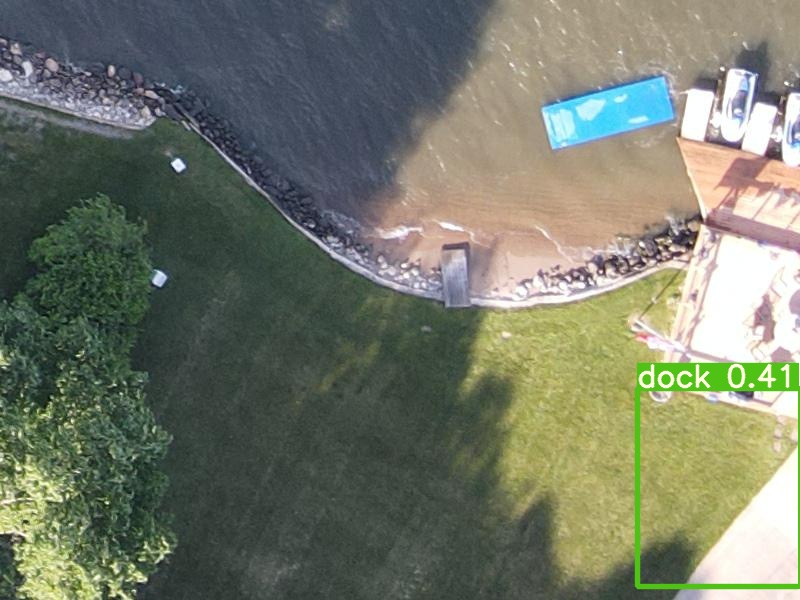

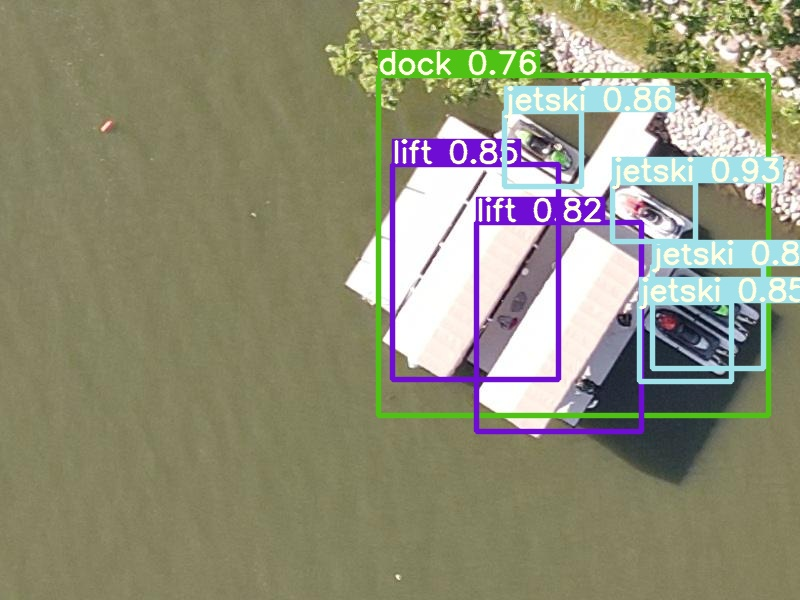

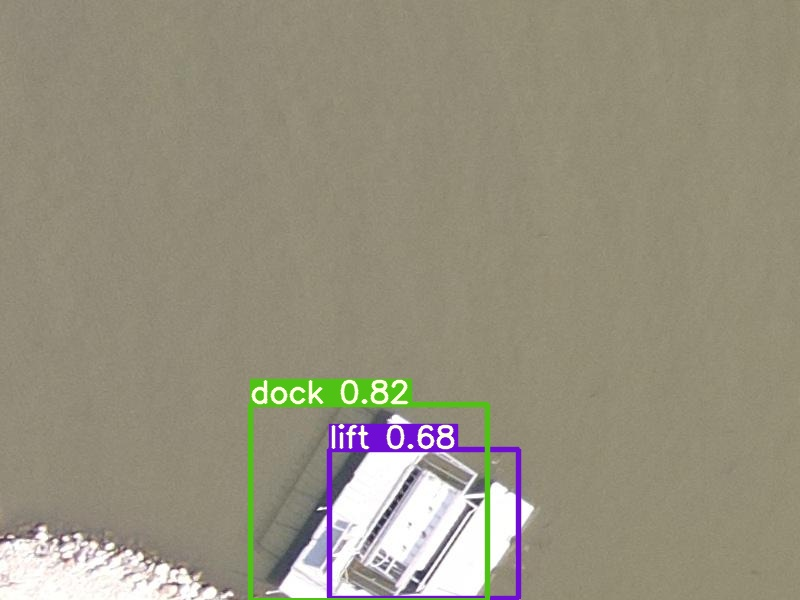

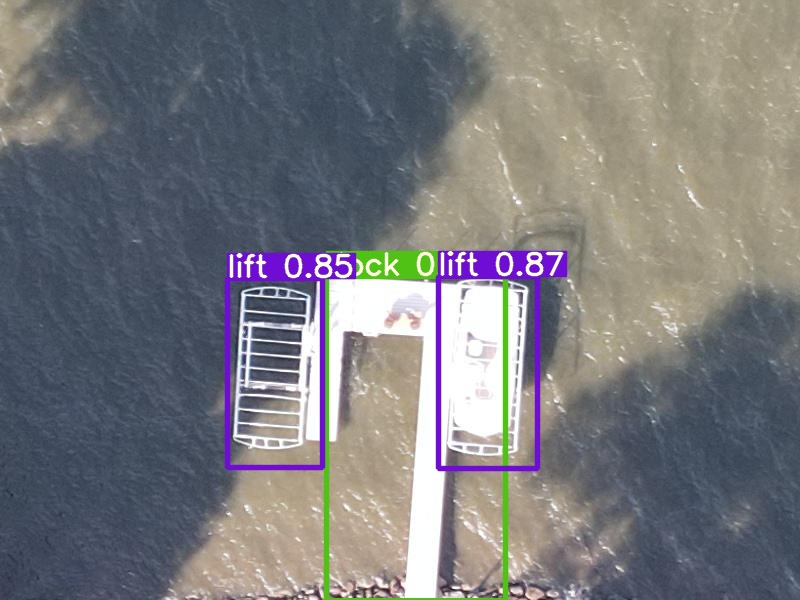

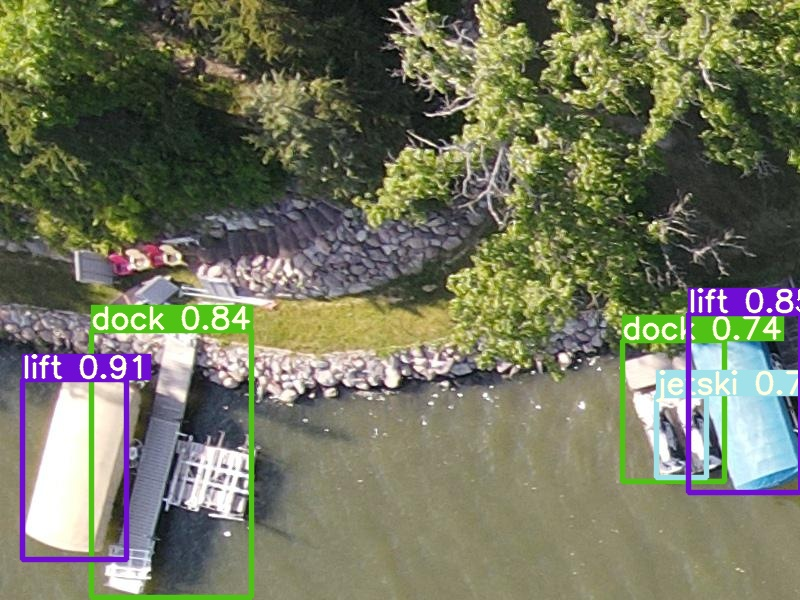

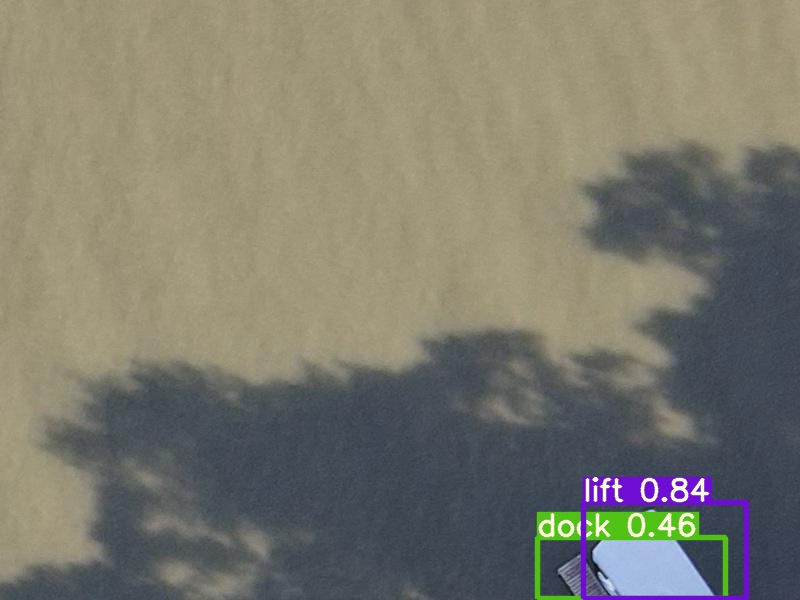

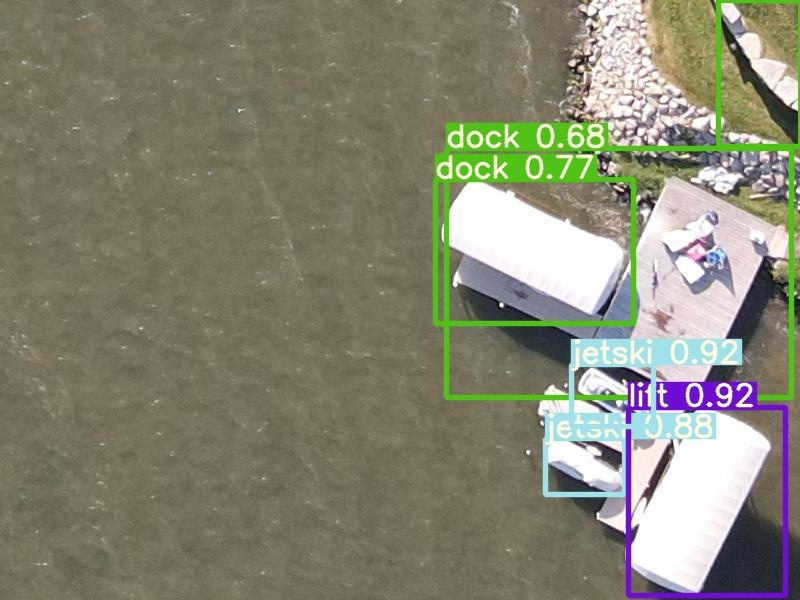

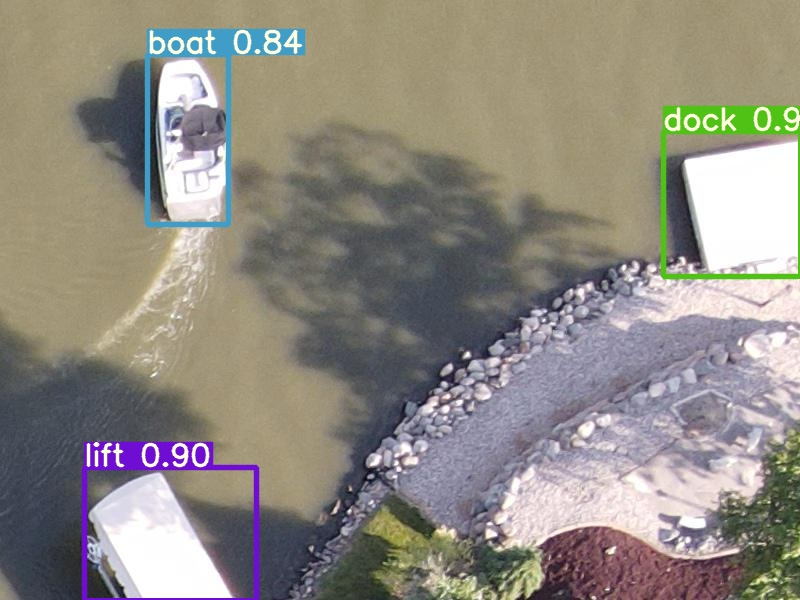

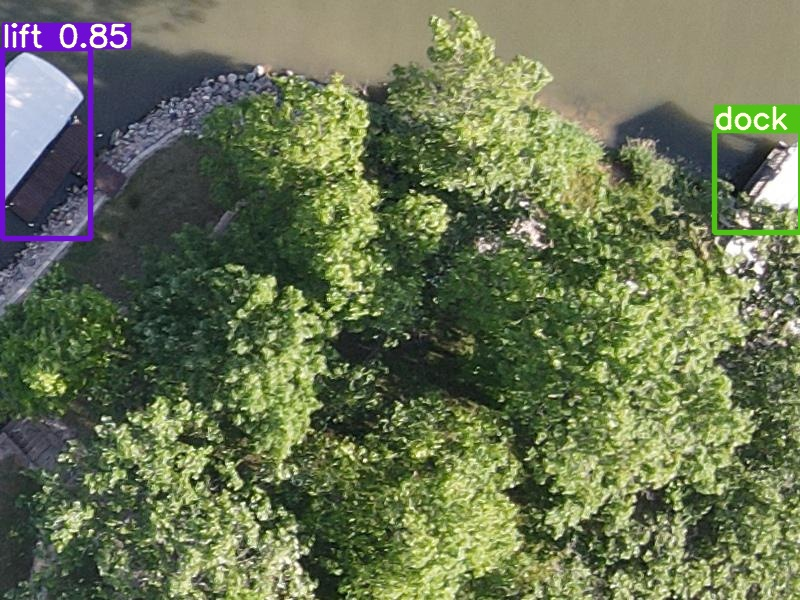

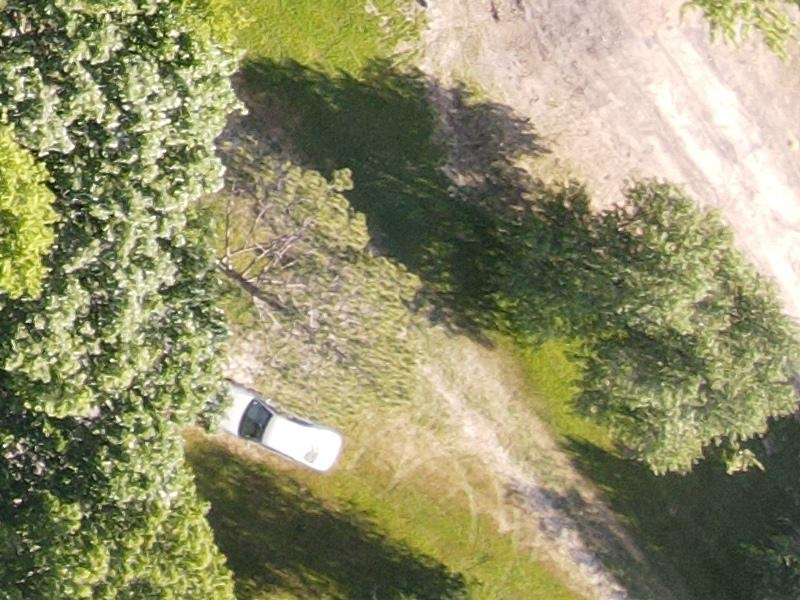

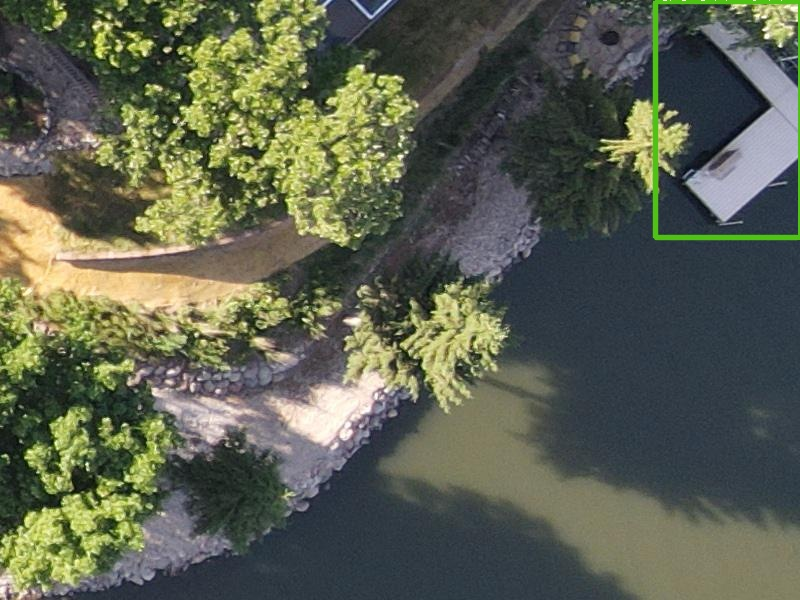

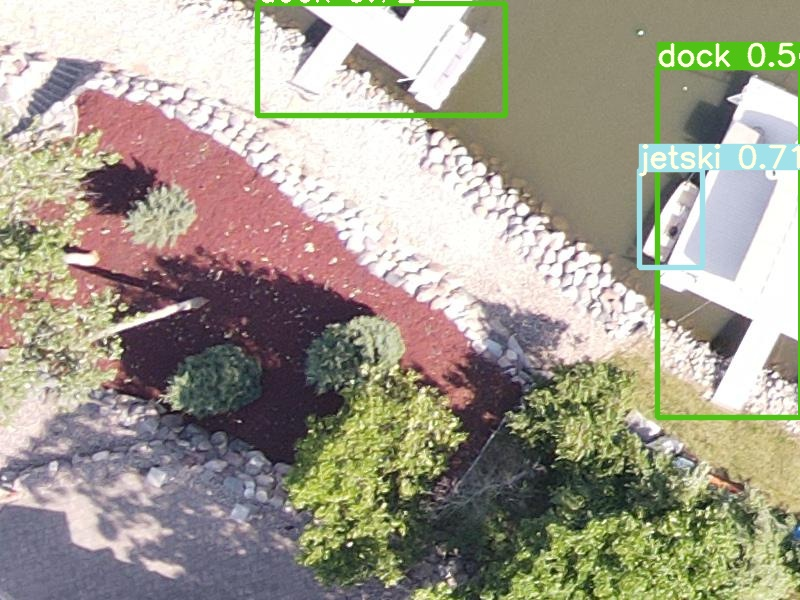

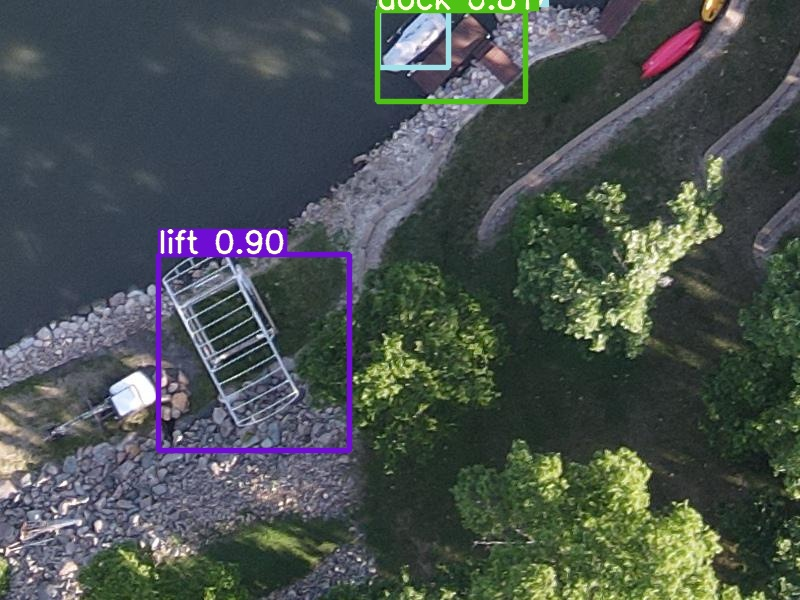

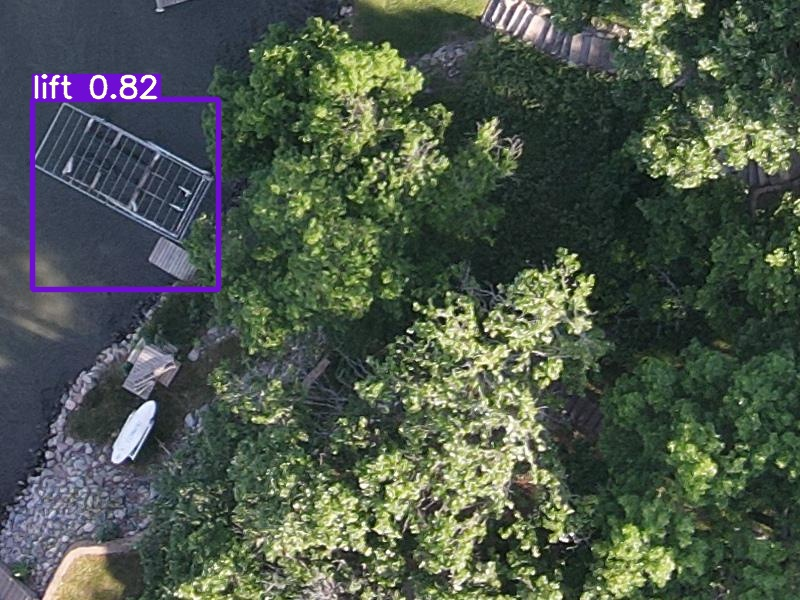

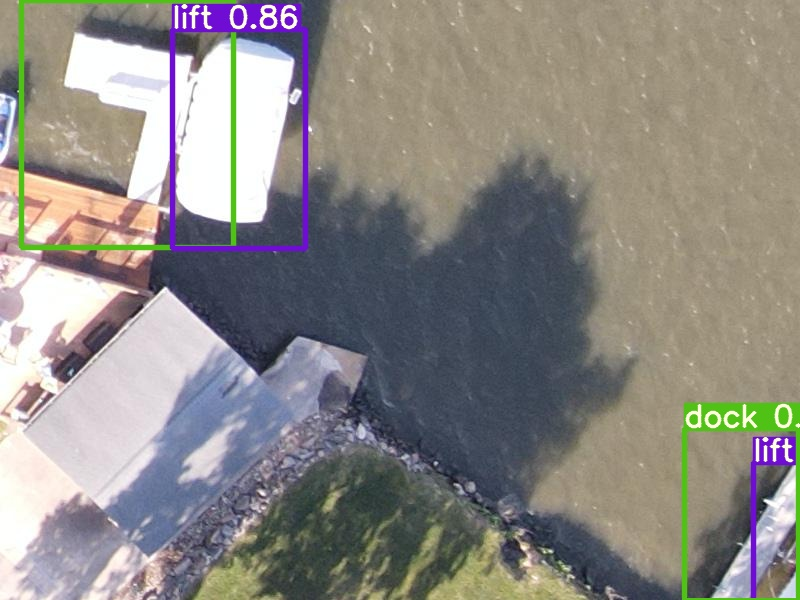

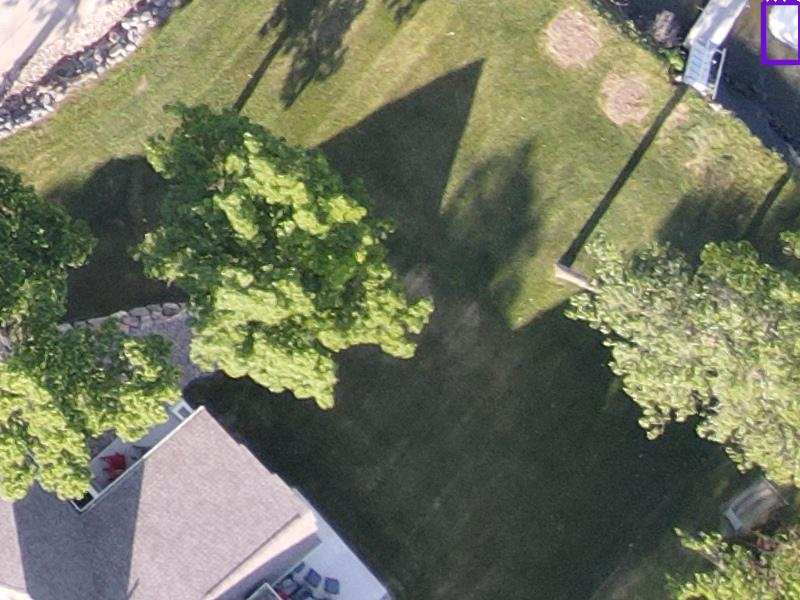

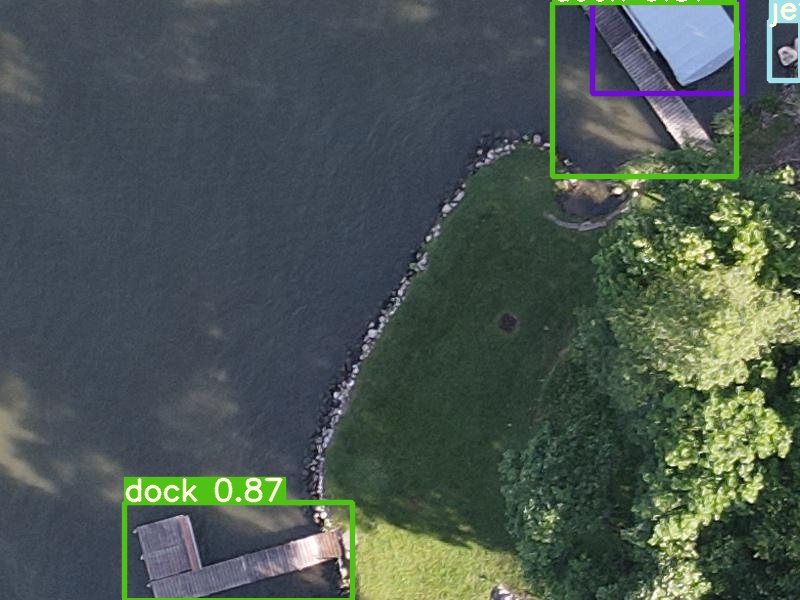

In [15]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp/*.jpg'):
    display(Image(filename=imageName))
    print("\n")